In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [0]:
!unzip -q "/content/drive/My Drive/fruits.zip"


In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
from keras.layers import Flatten,Dense


Using TensorFlow backend.


In [0]:
image_dimen=[100,100] #given in description

In [7]:
cls= VGG16(input_shape=image_dimen+[3],weights='imagenet',include_top=False)





58892288/58889256 [==============================] - 6s 0us/step








In [0]:
for i in cls.layers:
  i.trainable=False

In [9]:
train_cat=glob('/content/fruits-360_dataset/fruits-360/Training/*')
data_in=Flatten()(cls.output)
len(train_cat)

120

In [0]:
predicted=Dense(len(train_cat),activation='softmax')(data_in)

In [11]:
from keras.models import Model
cls_model=Model(inputs=cls.input,outputs=predicted)
cls_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [12]:
cls_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# to import dataset and for image data agumentation we use the image data generator
train_data_aug=ImageDataGenerator(rescale=1/255,shear_range=0.25,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [0]:
test_data_aug=ImageDataGenerator(rescale=1/255)

In [18]:
train_data=train_data_aug.flow_from_directory('/content/fruits-360_dataset/fruits-360/Training',target_size=(100,100),batch_size=32,class_mode='categorical')

Found 60498 images belonging to 120 classes.


In [23]:
test_data=test_data_aug.flow_from_directory('/content/fruits-360_dataset/fruits-360/Test',target_size=(100,100),batch_size=32,class_mode='categorical')

Found 20622 images belonging to 120 classes.


In [24]:
hist=cls_model.fit_generator(train_data,validation_data=test_data,epochs=5,steps_per_epoch=len(train_data),validation_steps=len(test_data))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
1891/1891 [==============================] - 200s 106ms/step - loss: 0.8541 - acc: 0.8196 - val_loss: 0.4414 - val_acc: 0.8952
Epoch 2/5
1891/1891 [==============================] - 188s 99ms/step - loss: 0.1928 - acc: 0.9623 - val_loss: 0.2627 - val_acc: 0.9339
Epoch 3/5
1891/1891 [==============================] - 186s 99ms/step - loss: 0.1096 - acc: 0.9769 - val_loss: 0.2476 - val_acc: 0.9286
Epoch 4/5
1891/1891 [==============================] - 185s 98ms/step - loss: 0.0775 - acc: 0.9819 - val_loss: 0.2125 - val_acc: 0.9423
Epoch 5/5
1891/1891 [==============================] - 184s 97ms/step - loss: 0.0592 - acc: 0.9860 - val_loss: 0.1969 - val_acc: 0.9460


Found 0 images belonging to 0 classes.


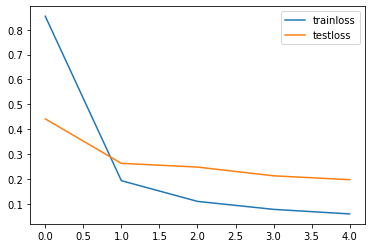

<Figure size 432x288 with 0 Axes>

In [28]:
plt.plot(hist.history['loss'],label='trainloss')
plt.plot(hist.history['val_loss'],label='testloss')
plt.legend()
plt.show()
plt.savefig('losses')


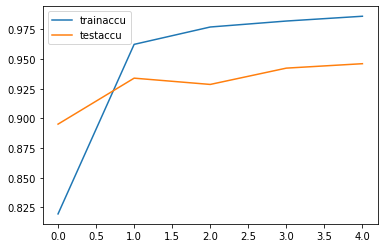

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(hist.history['acc'],label='trainaccu')
plt.plot(hist.history['val_acc'],label='testaccu')
plt.legend()
plt.show()
plt.savefig('accuracies')